# Projet Analyse de Données
# Tunisian property price Analytics

## Table de contenu

1. Problématique

2. Importation des Packages nécessaires

3. Importation de la DataSet

4. Exploration de la DataSet

5. Nettoyage des données

6. Visualisation des données

7. Relation entre les colonnes

8. Etude d'un cas particulier

9. Conclusion

## 1. Problématique

Pourquoi l'augmentation des prix de location et de vente immobilière en Tunisie est-elle devenue un enjeu de société et quelles sont les principales causes de cette hausse ? 
C'est ce qu'on va voir durant le traitement de la DataSet importée du site Tayara.tn avec des annonces qui depuis des années afin de comprendre c'est quoi le facteur principal dans ce cas

## 2. Importation des Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

## 3. Importation de la DataSet

In [2]:
df = pd.read_csv("set.csv")

## 4. Exploration de la DataSet ##

In [3]:
df.head(10)

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,Ariana,Autres villes,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075
7,"Magasins, Commerces et Locaux industriels",2.0,1.0,20.0,À Louer,650.0,Ariana,Borj Louzir,2.812913
8,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,180000.0,Ariana,Autres villes,5.255273
9,"Magasins, Commerces et Locaux industriels",1.0,1.0,40.0,À Louer,450.0,Ariana,Ariana Ville,2.653213


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB


In [5]:
df.shape

(12748, 9)

In [6]:
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [7]:
df.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

## 5. Nettoyage des données

### On constate que toutes les tables n'ont pas des valeurs nulls déjà ###
mais on va les constater autrement vu qu'il y a la présence de la valeur -1 fréquente

In [8]:
(df==-1).sum()

category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
price                0
city                 0
region               0
log_price            0
dtype: int64

##### D'après cette étude on constate que : #####
* La présence de la valeur -1 => la valeur est NULL
* Le nombre de présence de la valeur -1 est le même dans 3 colonnes
* le prix 'price' varie entre 100 et 10e+11, ce qui exprime que la DataSet contient des propriétés à louer 'rent' et d'autres à vendre 'sale'

## 6. Visualisation des données

On va tout d'abord remplacer les valeurs -1 par des valeurs null ('nan') et on va supprimer les duplications

In [9]:
df = df.replace(-1, float('nan'))

In [10]:
df.drop_duplicates(keep = 'first', inplace=True)

On va étudier la colonne 'type'

In [11]:
print(df.type.value_counts())

À Vendre    6556
À Louer     4579
Name: type, dtype: int64


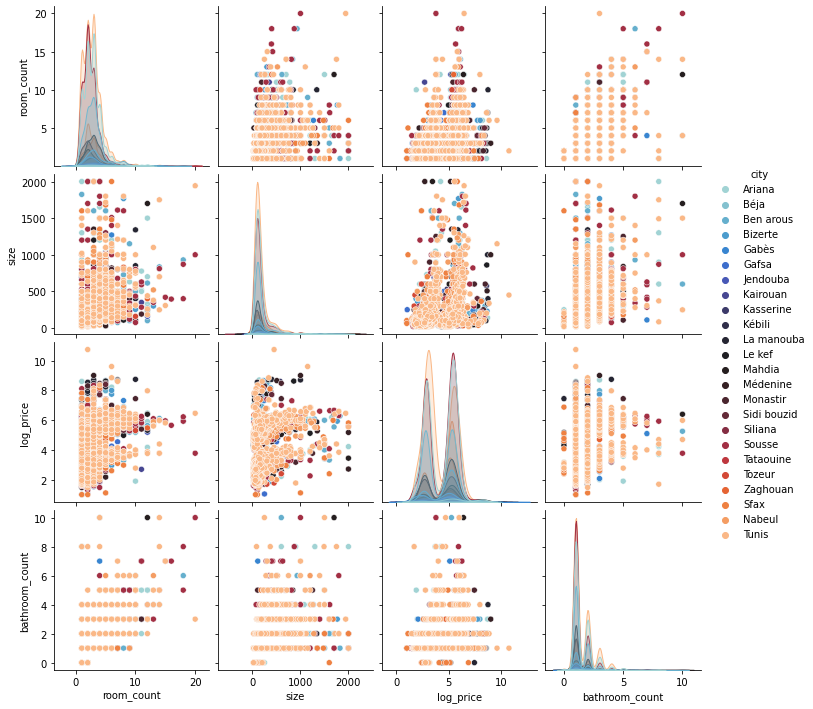

In [12]:
corr=df[['category','room_count','city','size','type','log_price','region','bathroom_count']]
sns.pairplot(corr, hue='city', palette='icefire')
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

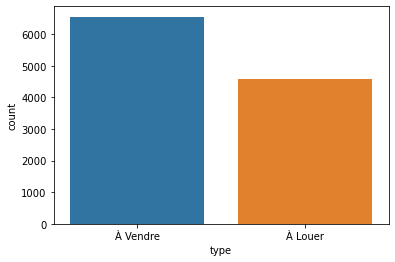

In [13]:
sns.countplot(data= df, x = 'type')

On a également deux types qui dominent ; A louer et A vendre.
Pour mieux affiner les réusltats on va essayer de mieux les comprendre par la suite

In [14]:
print(df.category.nunique())
print(df.category.unique())

7
['Terrains et Fermes' 'Appartements' 'Locations de vacances'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Colocations' 'Bureaux et Plateaux']


Ces deux types règnent dans les 7 catégories qu'on a. Donc dans cette partie on va consulter ces 7 derniers ainsi que leurs emplacements

<AxesSubplot:xlabel='category', ylabel='count'>

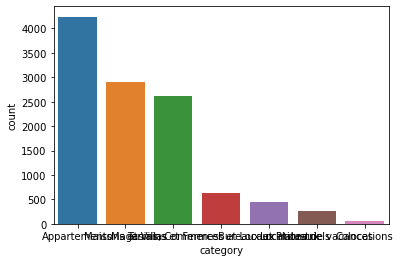

In [15]:
plt.Figure(figsize=(20,4))
sns.countplot(data = df, x = 'category', order = df.category.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='city'>

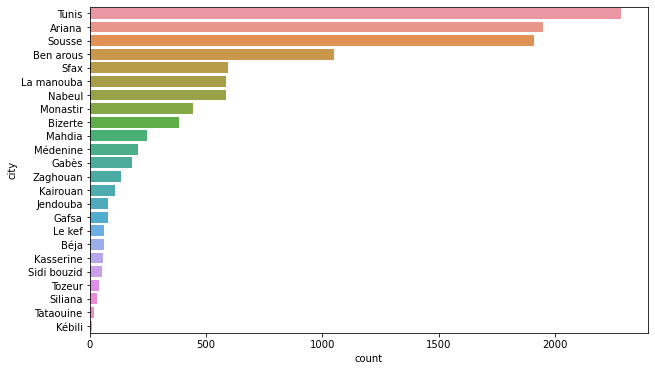

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, y = 'city', order = df.city.value_counts().index)

On remarque que sur Tunis, on trouve la majorité des annonces suivie par Ariana, maintenant on va étudier les autres colonnes 

In [17]:
print(df.room_count.nunique())
print(df.room_count.unique())

18
[nan  2.  1.  4.  5.  3.  6.  8.  7. 11. 12. 10.  9. 18. 14. 13. 20. 15.
 16.]


<AxesSubplot:xlabel='room_count', ylabel='count'>

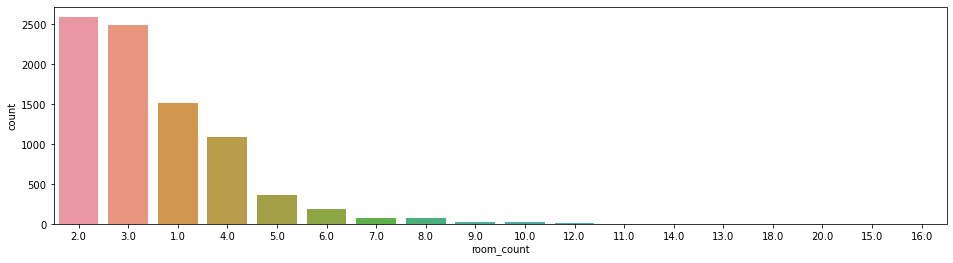

In [18]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df, x = 'room_count', order = df.room_count.value_counts().index)

In [19]:
print(df.bathroom_count.nunique())
print(df.bathroom_count.unique())

10
[nan  1.  2.  3.  4.  0.  5.  8.  6. 10.  7.]


<AxesSubplot:xlabel='bathroom_count', ylabel='count'>

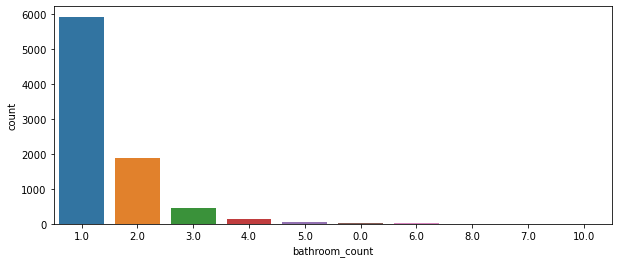

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x = 'bathroom_count', order = df.bathroom_count.value_counts().index)

A ce niveau, on va voir le role de la taille par rapport au prix

c:\Users\ouzem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size', ylabel='Density'>

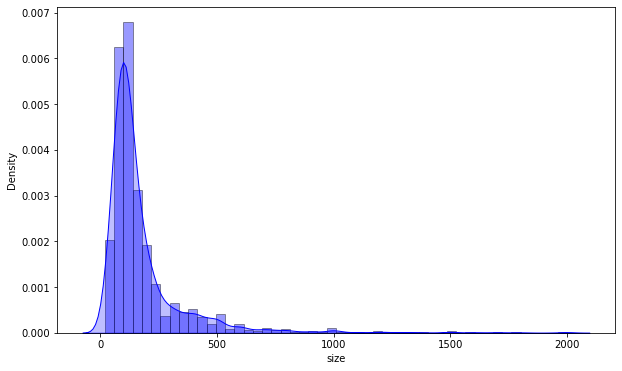

In [21]:
plt.figure(figsize=(10, 6))
sns.distplot(df['size'], hist=True, kde=True, 
              color = 'blue',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='size', ylabel='price'>

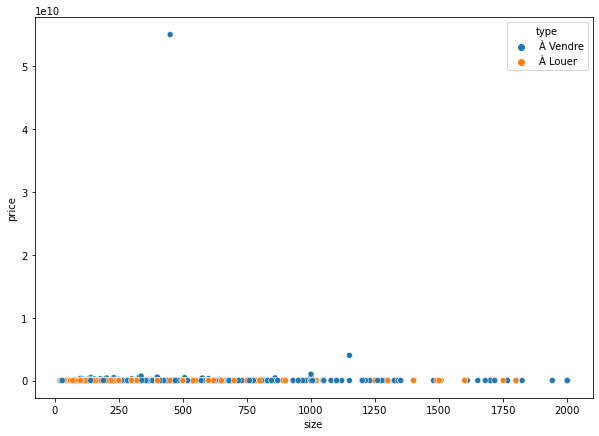

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="price", hue="type")

c:\Users\ouzem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

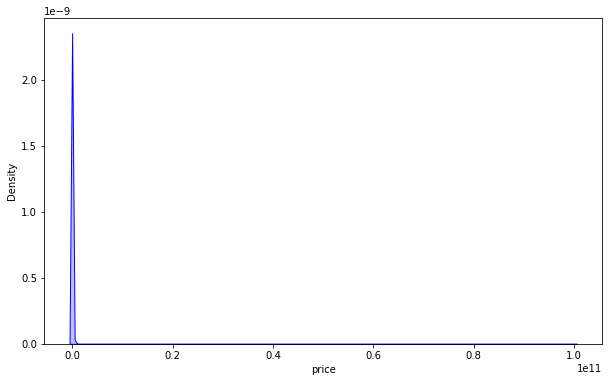

In [23]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], hist=False, kde=True, 
              color = 'blue',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Bien vu que la colonne prix n'est pas assez expressive, du coup il est préférable d'utiliser 'log_price'

### Pour conclure la relation entre la taille et le prix ###

<AxesSubplot:xlabel='size', ylabel='log_price'>

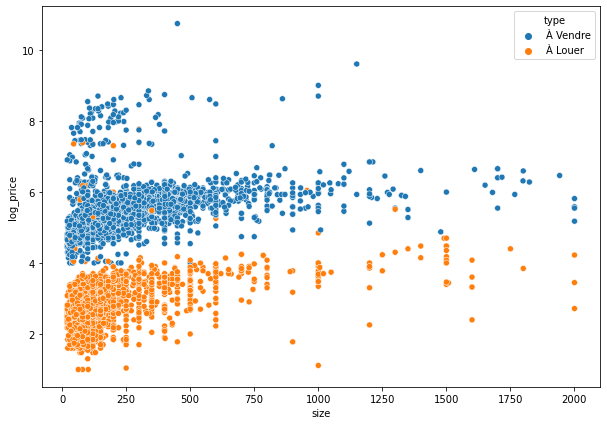

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="log_price", hue="type")

c:\Users\ouzem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

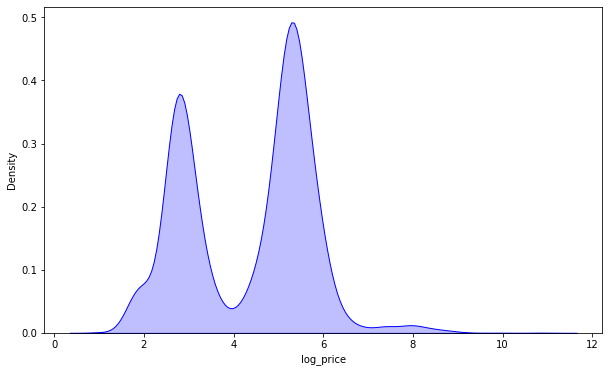

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(df['log_price'], hist=False, kde=True, 
              color = 'blue',bins = 20,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Comme vous pouvez le voir, lorsque nous utilisons le prix, je ne peux pas vraiment voir ma distribution. On appelle cette partie à droite **Données asymétriques (Skewed Data)** <img src='https://www.mathsisfun.com/data/images/skewed-distribution.svg' alt='skewed data' width = 400px>

Avant de continuer, supprimons ces valeurs nulles, il y a une forte probabilité qu'elles soient toutes liées.

In [26]:
df.dropna(thresh = 9, inplace=True)

On va voir comment c'est devenu la charte

<AxesSubplot:xlabel='category', ylabel='count'>

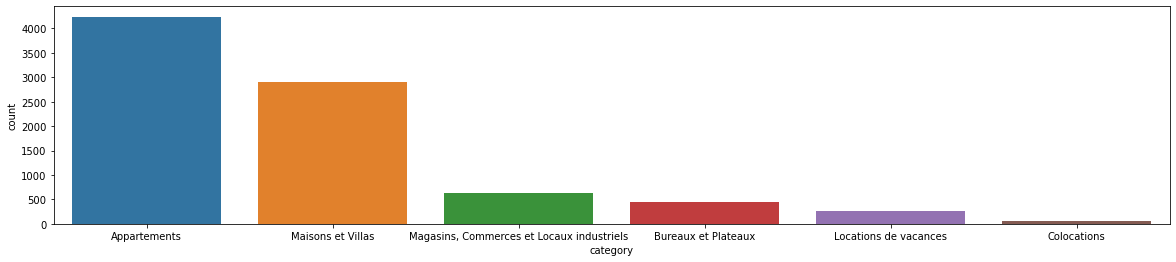

In [27]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'category', order=df.category.value_counts().index)

On remarque que c'est encore mieux avec cette présentation, alors on va diviser nos données de la colonne Type en deux

In [28]:
dfVendre = df[df.type == 'À Vendre']
dfLouer = df[df.type == 'À Louer']

In [29]:
print(dfVendre.shape)
print(dfLouer.shape)

(3949, 9)
(4579, 9)


## 7. Les relations qui relients les colonnes entre elles dans les cas de vente et location : ##
1. La relation entre le prix et la taille
2. La relation entre la taille et la ville
3. La relation entre la ville et le prix

<AxesSubplot:xlabel='city', ylabel='log_price'>

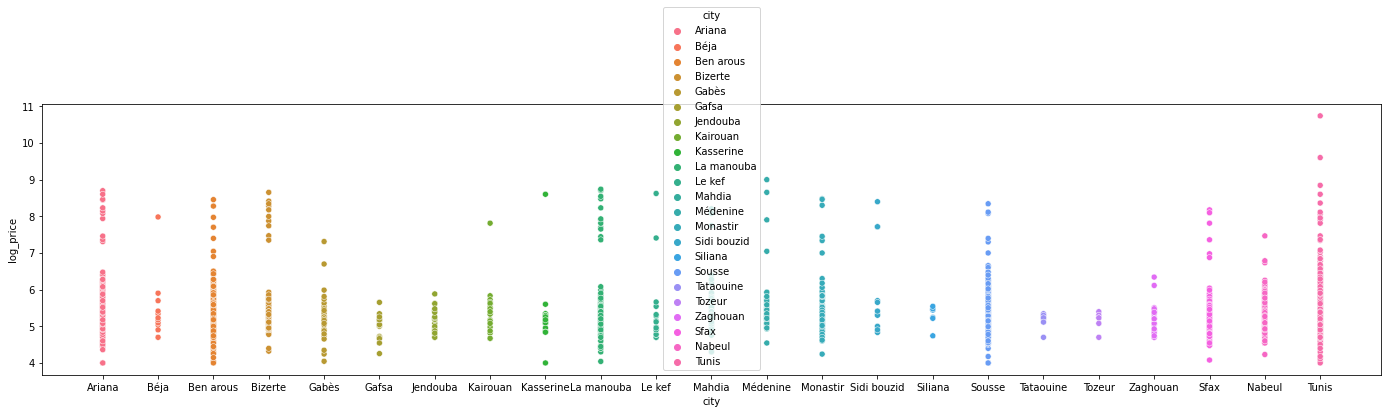

In [30]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfVendre , x="city", y="log_price" , hue='city')

<AxesSubplot:xlabel='city', ylabel='log_price'>

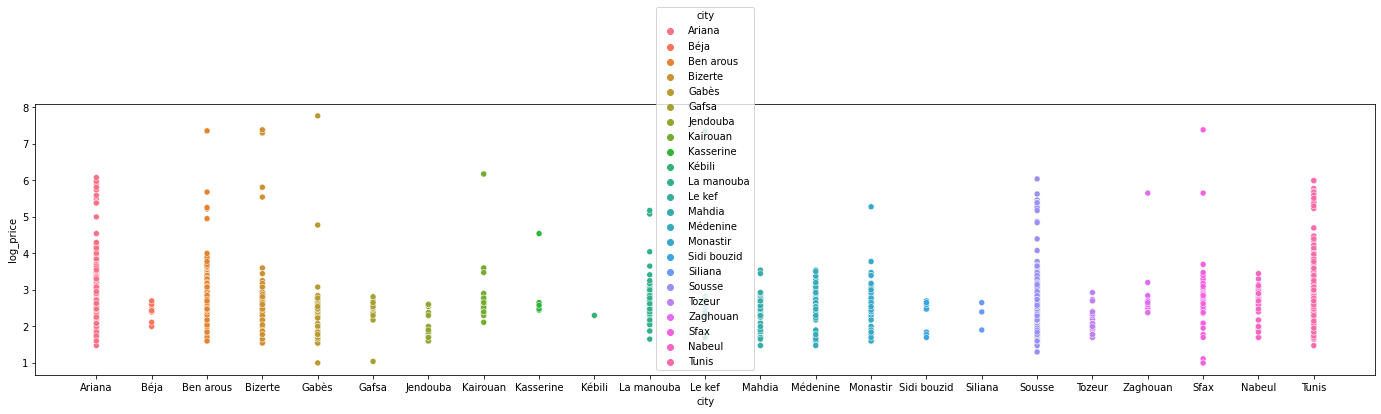

In [31]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfLouer , x="city", y="log_price" , hue='city')

<AxesSubplot:xlabel='size', ylabel='log_price'>

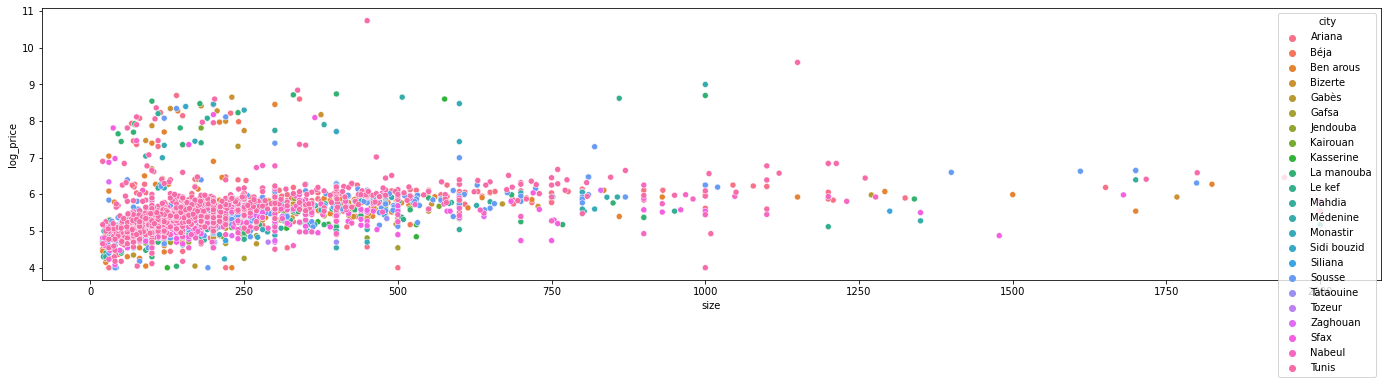

In [32]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfVendre , x="size", y="log_price" , hue='city')

<AxesSubplot:xlabel='size', ylabel='log_price'>

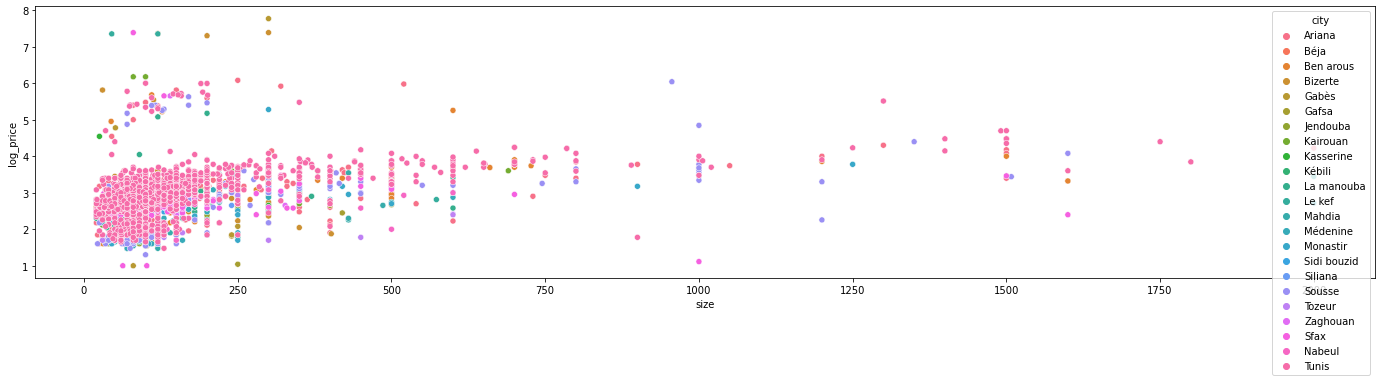

In [33]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfLouer , x="size", y="log_price" , hue='city')

<AxesSubplot:xlabel='city', ylabel='size'>

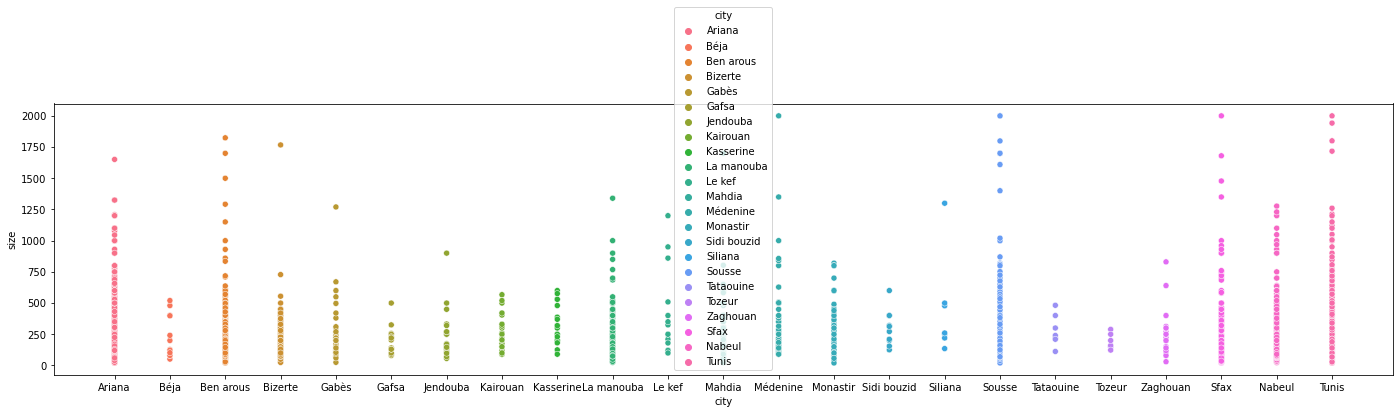

In [34]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfVendre , x="city", y="size" , hue='city')

<AxesSubplot:xlabel='city', ylabel='size'>

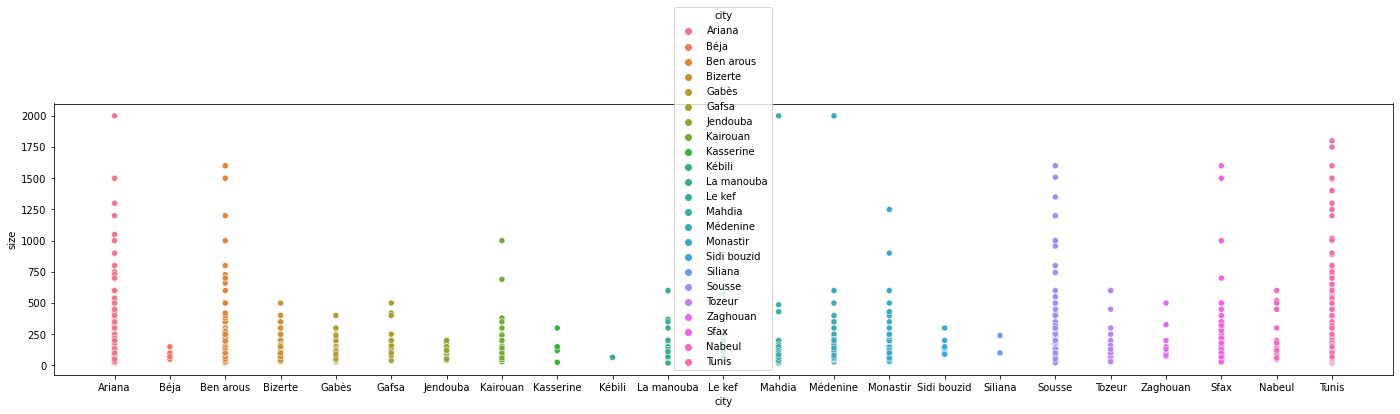

In [35]:
plt.figure(figsize=(24, 5))
sns.scatterplot(data = dfLouer , x="city", y="size" , hue='city')

## Encore la relation entre ces 3 derniers mais en faisant un tri pour le prix ##

In [36]:
df = df.sort_values('log_price', ascending=False)
df = df.reset_index(drop=True)

On va diviser nos colonnes de prix, ville et taille en sous dataframes

In [37]:
cities = df['city']
prices = df['log_price']
sizes = df['size']

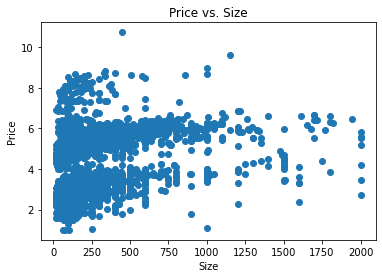

In [38]:
fig, ax = plt.subplots()
ax.scatter(sizes, prices)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Price vs. Size')
plt.show()

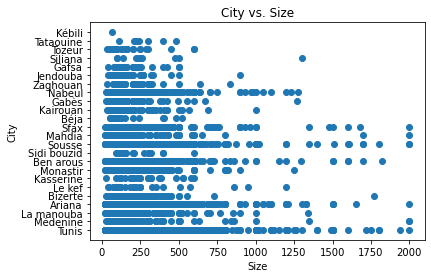

In [39]:
fig, ax = plt.subplots()
ax.scatter(sizes, cities)
ax.set_xlabel('Size')
ax.set_ylabel('City')
ax.set_title('City vs. Size')
plt.show()

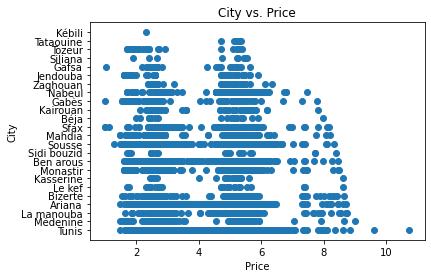

In [40]:
fig, ax = plt.subplots()
ax.scatter(prices, cities)
ax.set_xlabel('Price')
ax.set_ylabel('City')
ax.set_title('City vs. Price')
plt.show()

## 8. Etude du particulier de la ville Tunis ##

In [41]:
city_df = df[df["city"] == "Tunis"]

In [42]:
avg_price = city_df["price"].mean()
avg_size = city_df["size"].mean()

print(f"Le prix moyen à Tunis est de {avg_price} et la taille moyenne est {avg_size}")

Le prix moyen à Tunis est de 29185395.682811014 et la taille moyenne est 184.38129154795823


Visualisons le prix en fonction de la taille sur Tunis

In [43]:
prices = city_df['log_price']
sizes = city_df['size']

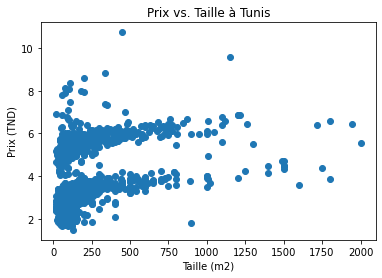

In [44]:
plt.scatter(sizes, prices)
plt.xlabel('Taille (m2)')
plt.ylabel('Prix (TND)')
plt.title('Prix vs. Taille à Tunis')
plt.show()

## 9. Conclusion

<AxesSubplot:xlabel='log_price', ylabel='size'>

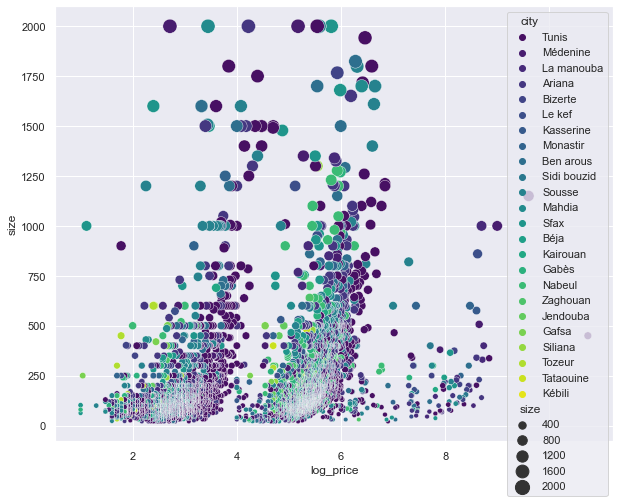

In [45]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.scatterplot(data=df, x='log_price', y='size', hue='city', size='size', palette='viridis', sizes=(20, 200))

D'après ce dernier plot, on peut conclure que c'est la ville qui domine le plus sur ce facteur de l'augmentation du prix, en fonction de la taille bien évidemment. Car si on prend l'exemple de Kébili, on ne peut même pas remarquer son existence sur cette representation par rapport à Sousse par exemple qui se situe généralement au milieu. Enfin, c'est la ville en premier, et la taille en deuxème place suivie par le nombre de chambres qui peuvent déduire le prix d'un endroit soit pour la location ou la vente